### Submission: 
Submit your assignment in GITHUB Repository in the form of .ipynb (code must merged to the main branch) Include code, visualization and explanation of each task. 

You can follow these initial steps:
•	Create a GITHUB repository
•	Add your team member as collaborators.
•	Create your separate branch from main.


### Assignment: Analyzing Stock Data

### Background:
You have been provided with a dataset containing historical stock price data for a company. 
Your task is to perform various data analysis tasks using Pandas, NumPy, and Matplotlib to gain insights into the stock's performance.

Dataset: You can use any stock price dataset or create a synthetic dataset for this assignment. The dataset should contain at least the following columns:

Date (representing the trading dates)
Open (the opening price of the stock on that date)
Close (the closing price of the stock on that date)
High (the highest price of the stock during the trading session)
Low (the lowest price of the stock during the trading session)
Volume (the trading volume of the stock on that date)
You can use libraries like yfinance to fetch real stock data or create a synthetic dataset using NumPy.

Tasks:

#### Data Loading and Inspection:
Load the stock price dataset into a Pandas DataFrame.
Display the first 5 rows of the DataFrame.
Check for missing values and handle them if necessary.

#### Data Exploration:
Calculate and display basic statistics (mean, median, standard deviation) for the 'Close' price.
Create a line plot of the 'Close' price over time (use Date on the x-axis).


#### Data Analysis:
Calculate and visualize the moving average of the stock's 'Close' price over a specific window (e.g., 30 days).
Identify and visualize any significant price changes or trends in the stock.
Volume Analysis

#### Analyze the trading volume of the stock:
Calculate the average daily trading volume.
Visualize the trading volume over time.

#### Financial Metrics:
Calculate daily returns for the stock.
Calculate and visualize the cumulative returns of the stock over time.
Calculate and visualize the rolling standard deviation of the daily returns.

#### Correlation Analysis:
Calculate the correlation between the stock's returns and the returns of a market index (e.g., S&P 500).
Visualize the correlation using a scatter plot.

#### Conclusion:
Summarize your findings from the analysis.
Provide insights into the stock's performance and any trends or patterns you observed.


### Data Loading and Inspection:

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = yf.download('META','2023-01-01','2023-08-18')

[*********************100%%**********************]  1 of 1 completed


In [2]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       0 non-null      float64
 1   High       0 non-null      float64
 2   Low        0 non-null      float64
 3   Close      0 non-null      float64
 4   Adj Close  0 non-null      float64
 5   Volume     0 non-null      float64
dtypes: float64(6)
memory usage: 0.0+ bytes


In [4]:
data.isna().sum()

Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,122.820000,126.370003,122.279999,124.739998,124.739998,35528500
2023-01-04,127.379997,129.050003,125.849998,127.370003,127.370003,32397100
2023-01-05,126.129997,128.520004,124.540001,126.940002,126.940002,25447100
2023-01-06,128.970001,130.330002,126.040001,130.020004,130.020004,27584500
2023-01-09,131.160004,132.949997,129.279999,129.470001,129.470001,26649100


In [9]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-11,302.570007,304.720001,300.359985,301.640015,301.640015,13967800
2023-08-14,300.980011,306.209991,298.250000,306.190002,306.190002,15641900
2023-08-15,306.140015,307.230011,300.029999,301.950012,301.950012,11623600
2023-08-16,300.200012,301.079987,294.279999,294.290009,294.290009,18547700
2023-08-17,293.049988,296.049988,284.950012,285.089996,285.089996,23950100


### Data Exploration:

In [10]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,157.000000,157.000000,157.000000,157.000000,157.000000,1.570000e+02
mean,228.258281,231.872675,225.431083,228.732420,228.732420,2.723415e+07
std,57.641521,57.894216,56.530083,57.028270,57.028270,1.479996e+07
min,122.820000,126.370003,122.279999,124.739998,124.739998,8.629300e+06
25%,183.380005,186.649994,180.160004,183.429993,183.429993,1.919820e+07
50%,219.910004,222.110001,217.550003,221.490005,221.490005,2.417130e+07
75%,282.010010,286.570007,278.359985,281.829987,281.829987,2.984210e+07
max,325.119995,326.200012,317.589996,325.480011,325.480011,1.504757e+08


In [11]:
data.describe().loc[['mean','50%','std']]

,Open,High,Low,Close,Adj Close,Volume
mean,228.258281,231.872675,225.431083,228.732420,228.732420,2.723415e+07
50%,219.910004,222.110001,217.550003,221.490005,221.490005,2.417130e+07
std,57.641521,57.894216,56.530083,57.028270,57.028270,1.479996e+07


In [12]:
data.describe().loc[['mean','50%','std'],'Close']

mean    228.732420
50%     221.490005
std      57.028270
Name: Close, dtype: float64

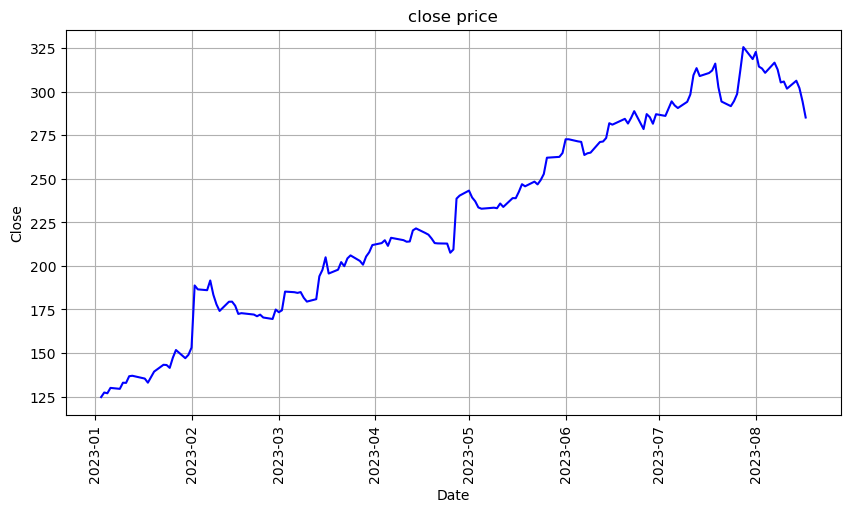

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(data.index,data['Close'], color = 'blue')
plt.xlabel('Date')
plt.ylabel('Close')
plt.tick_params(axis = 'x',labelrotation=90)
plt.title('close price')
plt.grid(True)
plt.show();

### Data Analysis:

In [14]:
data['moving_avg'] = data['Close'].rolling(30).mean()
data

,Open,High,Low,Close,Adj Close,Volume,moving_avg
Date,,,,,,,
2023-01-03,122.820000,126.370003,122.279999,124.739998,124.739998,35528500,NaN
2023-01-04,127.379997,129.050003,125.849998,127.370003,127.370003,32397100,NaN
2023-01-05,126.129997,128.520004,124.540001,126.940002,126.940002,25447100,NaN
2023-01-06,128.970001,130.330002,126.040001,130.020004,130.020004,27584500,NaN
2023-01-09,131.160004,132.949997,129.279999,129.470001,129.470001,26649100,NaN
...,...,...,...,...,...,...,...
2023-08-11,302.570007,304.720001,300.359985,301.640015,301.640015,13967800,305.084333
2023-08-14,300.980011,306.209991,298.250000,306.190002,306.190002,15641900,305.724666
2023-08-15,306.140015,307.230011,300.029999,301.950012,301.950012,11623600,306.255667


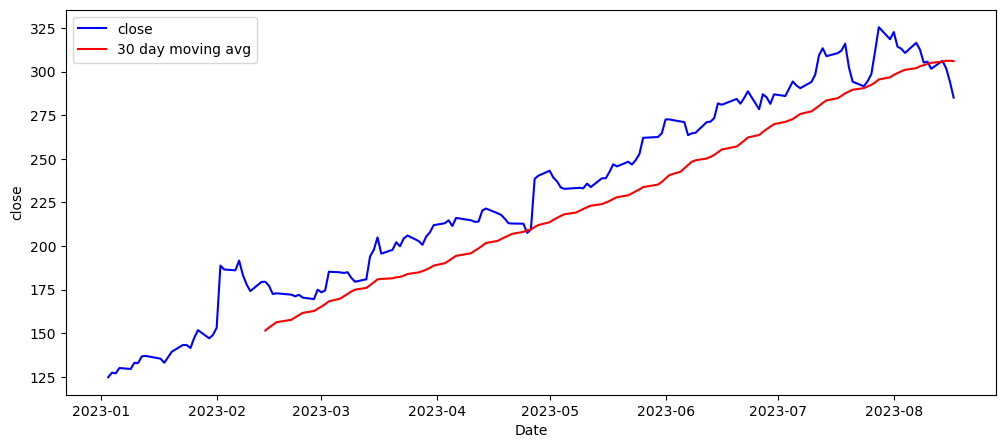

In [15]:
plt.figure(figsize = (12,5))
plt.plot(data.index,data['Close'],color = 'blue', label = 'close')
plt.plot(data.index,data['moving_avg'], color = 'red', label = '30 day moving avg')
plt.xlabel('Date')
plt.ylabel('close')
plt.legend()
plt.show;

### Analyze the trading volume of the stock:

In [16]:
data['Volume'].mean()

27234147.13375796

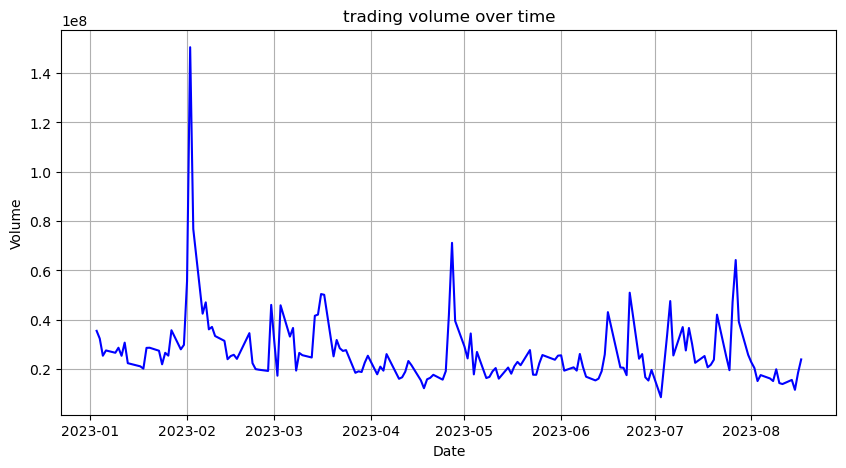

In [20]:
plt.figure(figsize = (10,5))
plt.plot(data.index,data['Volume'], color = 'blue')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('trading volume over time')
plt.grid(True)
plt.show();

### Financial Metrics:

In [21]:
data['returns'] = data['Close'].pct_change()
data['cum_daily_return'] = (1 + data['returns']).cumprod() - 1
data['rolling_std'] = data['returns'].rolling(10).std()
data

,Open,High,Low,Close,Adj Close,Volume,moving_avg,returns,cum_daily_return,rolling_std
Date,,,,,,,,,,
2023-01-03,122.820000,126.370003,122.279999,124.739998,124.739998,35528500,NaN,NaN,NaN,NaN
2023-01-04,127.379997,129.050003,125.849998,127.370003,127.370003,32397100,NaN,0.021084,0.021084,NaN
2023-01-05,126.129997,128.520004,124.540001,126.940002,126.940002,25447100,NaN,-0.003376,0.017637,NaN
2023-01-06,128.970001,130.330002,126.040001,130.020004,130.020004,27584500,NaN,0.024263,0.042328,NaN
2023-01-09,131.160004,132.949997,129.279999,129.470001,129.470001,26649100,NaN,-0.004230,0.037919,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-08-11,302.570007,304.720001,300.359985,301.640015,301.640015,13967800,305.084333,-0.013410,1.418150,0.015127
2023-08-14,300.980011,306.209991,298.250000,306.190002,306.190002,15641900,305.724666,0.015084,1.454626,0.015813
2023-08-15,306.140015,307.230011,300.029999,301.950012,301.950012,11623600,306.255667,-0.013848,1.420635,0.014900


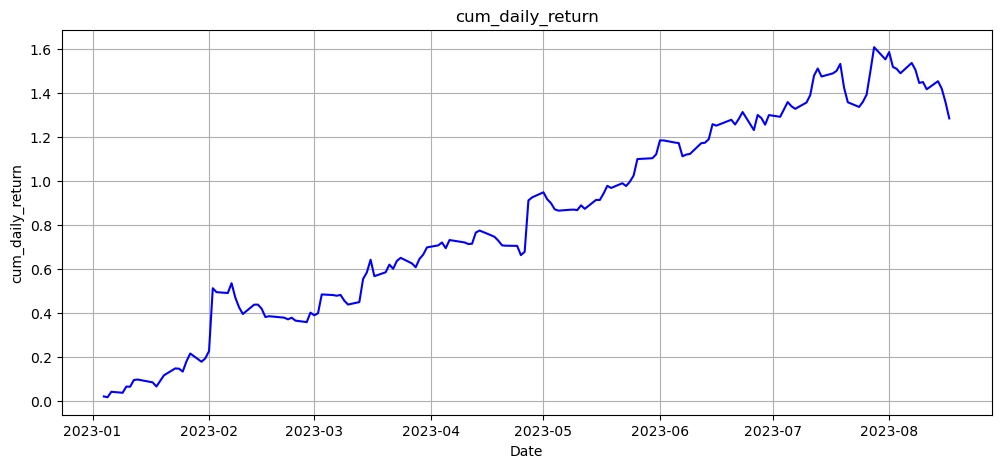

In [22]:
plt.figure(figsize = (12,5))
plt.plot(data.index,data['cum_daily_return'], color = 'blue')
plt.xlabel('Date')
plt.ylabel('cum_daily_return')
plt.title('cum_daily_return')
plt.grid(True)
plt.show();

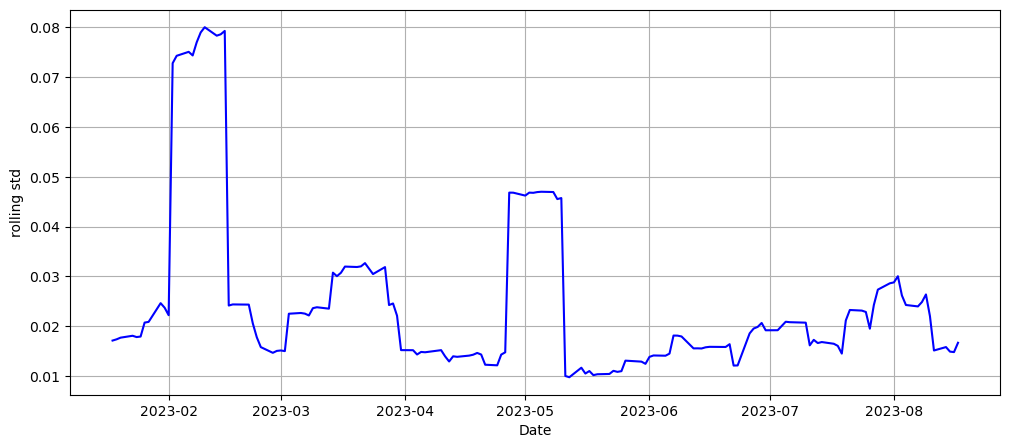

In [23]:
plt.figure(figsize = (12,5))
plt.plot(data.index,data['rolling_std'], color = 'blue')
plt.xlabel('Date')
plt.ylabel('rolling std')
plt.grid(True)
plt.show();

### Correlation Analysis:

In [24]:
snp_data = yf.download('SPY','2023-01-01','2023-08-18')
snp_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,384.369995,386.429993,377.829987,380.820007,376.639587,74850700
2023-01-04,383.179993,385.880005,380.000000,383.760010,379.547333,85934100
2023-01-05,381.720001,381.839996,378.760010,379.380005,375.215393,76970500
2023-01-06,382.609985,389.250000,379.410004,388.079987,383.819885,104189600
2023-01-09,390.369995,393.700012,387.670013,387.859985,383.602295,73978100
...,...,...,...,...,...,...
2023-08-11,443.970001,446.700012,443.350006,445.649994,444.083557,68664600
2023-08-14,444.700012,448.109985,444.380005,448.109985,446.534912,47867400
2023-08-15,446.269989,446.640015,442.299988,442.890015,441.333282,75707500


In [25]:
snp_data['returns'] = snp_data['Close'].pct_change()
snp_data

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2023-01-03,384.369995,386.429993,377.829987,380.820007,376.639587,74850700,NaN
2023-01-04,383.179993,385.880005,380.000000,383.760010,379.547333,85934100,0.007720
2023-01-05,381.720001,381.839996,378.760010,379.380005,375.215393,76970500,-0.011413
2023-01-06,382.609985,389.250000,379.410004,388.079987,383.819885,104189600,0.022932
2023-01-09,390.369995,393.700012,387.670013,387.859985,383.602295,73978100,-0.000567
...,...,...,...,...,...,...,...
2023-08-11,443.970001,446.700012,443.350006,445.649994,444.083557,68664600,-0.000583
2023-08-14,444.700012,448.109985,444.380005,448.109985,446.534912,47867400,0.005520
2023-08-15,446.269989,446.640015,442.299988,442.890015,441.333282,75707500,-0.011649


In [26]:
data['returns'].corr(snp_data['returns'])

0.574843662834744

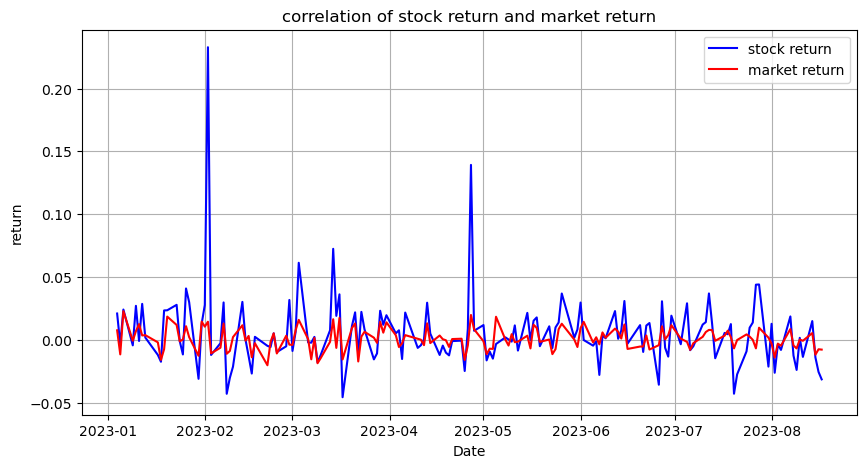

In [27]:
plt.figure(figsize = (10,5))
plt.plot(data.index,data['returns'], color = 'blue',label = 'stock return')
plt.plot(snp_data.index,snp_data['returns'], color = 'red',label = 'market return')
plt.xlabel('Date')
plt.ylabel('return')
plt.title('correlation of stock return and market return')
plt.legend()
plt.grid(True)
plt.show();

### Conclusion:

In [ ]:
There are no null values in the stock data from start date ='2023-01-01' to end date ='2023-08-18'.
Plotting stock close price with time tells us about that the stock price has increased from 125 to around 325 over a period of 8 months from january to end of august with minor upwards and downwards movement.
The Average Daily Trading Volume is 27234147.13375796. It shows a lot of fluctuation with time that means there were periods when the stock was actively bought and sold.
There is positive correlation of 0.574843662834744 between the stock returns and S&P index.